In [1]:
!python --version

Python 3.13.6


In [1]:
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
with open(file=r"../data/australia-borders-coordinates.npy", mode="rb") as fp:
    border = np.load(fp)

# Sorghum site info
sorghum = pd.read_csv(r"../data/Emma Sumner/CSBP_soil_analysis_Themeda_and_Sorghum.csv", skiprows=range(1, 20)) # the preceeding rows are metadata and Themeda samples
sorghum = sorghum.rename(mapper= lambda name: name.lower().strip().replace(' ', '_').replace('(', '').replace(')', '').replace('%', 'prcnt'), axis=1)

themeda = pd.read_csv(r"../data/Emma Sumner/CSBP_soil_analysis_Themeda_and_Sorghum.csv", skiprows=range(20, 35)).drop(0, axis=0)
themeda = themeda.rename(mapper= lambda name: name.lower().strip().replace(' ', '_').replace('(', '').replace(')', '').replace('%', 'prcnt'), axis=1)
themeda = themeda.astype({"total_nitrogen": np.float64, "total_phosphorus": np.float64, "total_carbon": np.float64, "prcnt_clay": np.float64, "prcnt_course_sand": np.float64, "prcnt_fine_sand": np.float64, "prcnt_sand": np.float64, "prcnt_silt": np.float64})

themeda_seeds = pd.read_csv(r"../data/themeda_seed_coords_vin.csv")

# ___Chemical properties___
-----------------

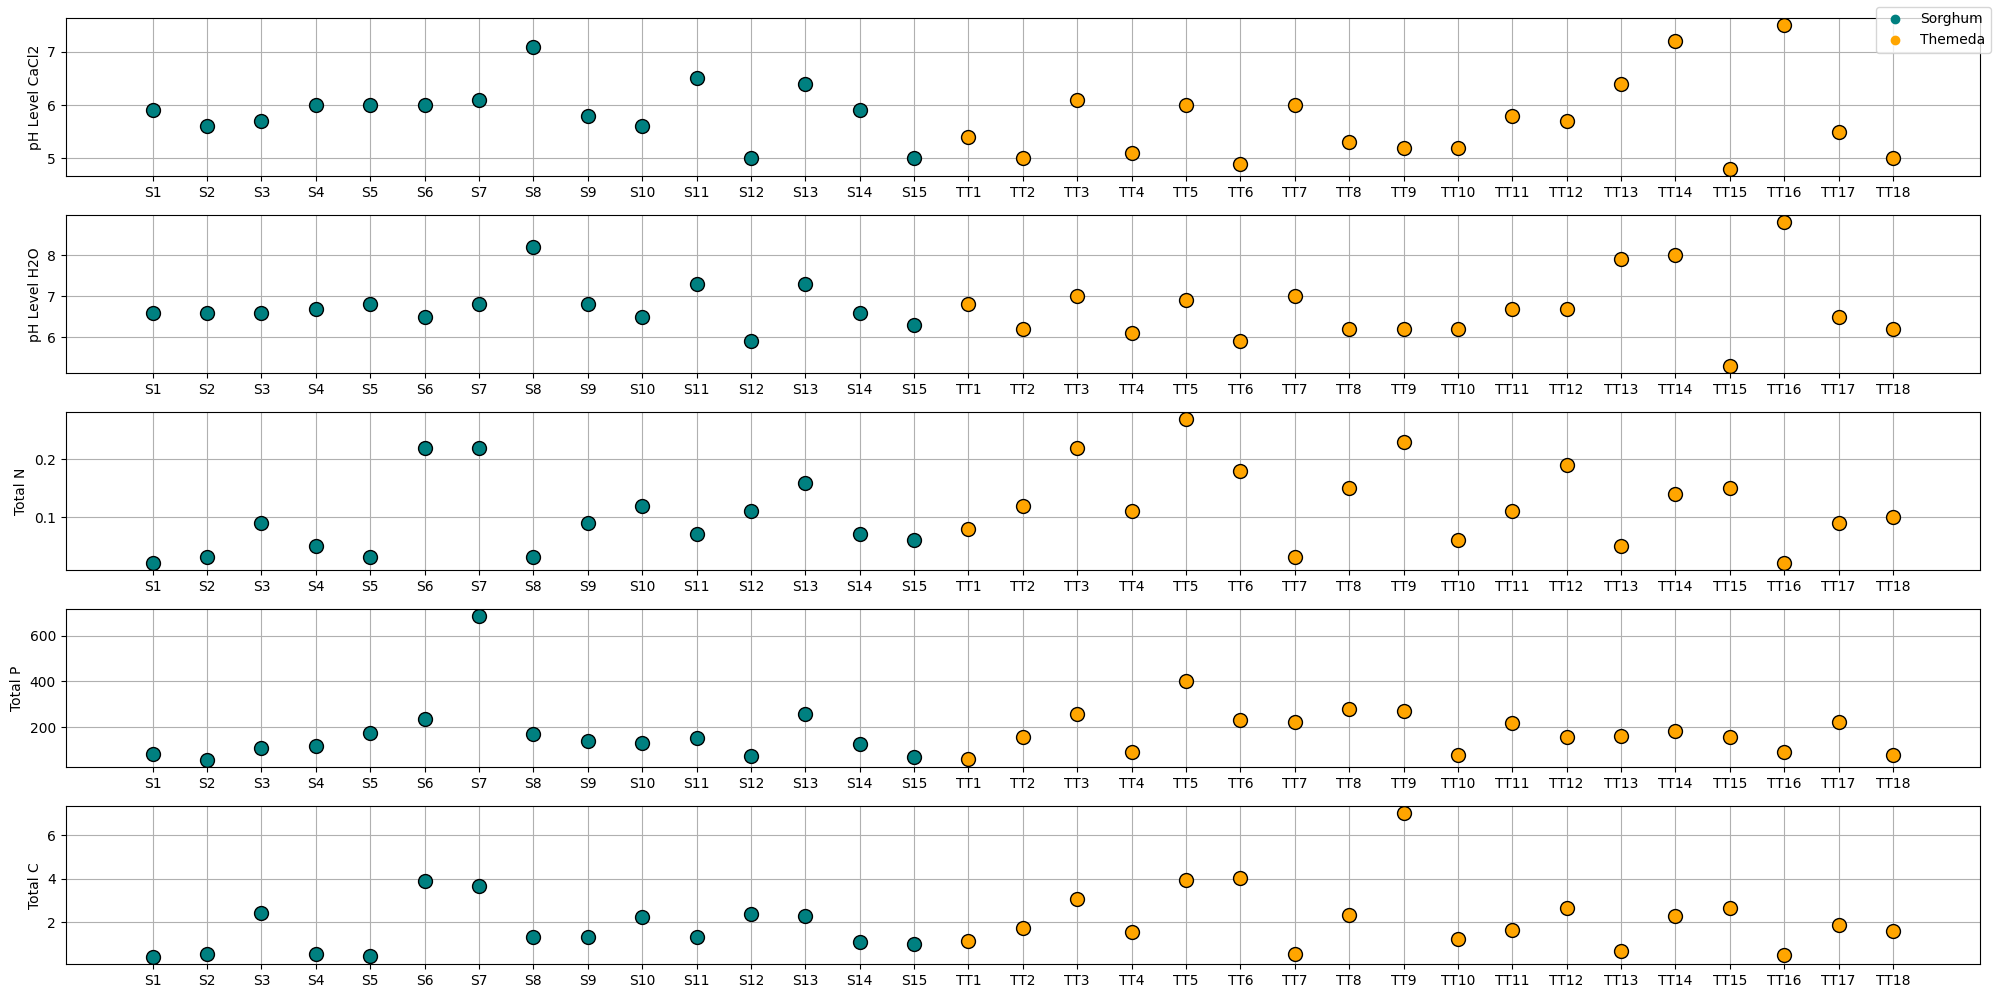

In [31]:
fig, axes = plt.subplots(nrows=5, sharex=False, sharey=False)
fig.set_size_inches(20, 10)

for (prop, name, axis) in zip(('ph_level_cacl2', 'ph_level_h2o', 'total_nitrogen', 'total_phosphorus', 'total_carbon'), ('pH Level CaCl2', 'pH Level H2O', 'Total N', 'Total P', 'Total C'), axes):
    axis.plot(sorghum.customer_sample_id, sorghum[prop], linestyle="none", marker='o', mec="black", mfc="teal", markersize=10)
    axis.plot(themeda.customer_sample_id, themeda[prop], linestyle="none", marker='o', mec="black", mfc="orange", markersize=10)
    axis.grid()
    axis.set_ylabel(name)

fig.legend(handles=(Line2D(xdata=[0], ydata=[0], color="teal", label="Sorghum", marker='o', linestyle="none"),
                    Line2D(xdata=[0], ydata=[0], color="orange", label="Themeda", marker='o', linestyle="none")),
           ncols=1, loc="upper right")    
plt.tight_layout()
plt.show()
# plt.savefig(fname=r"../plots/emma_chemical_props.jpeg", dpi=500)

# ___Soil texture___
--------------

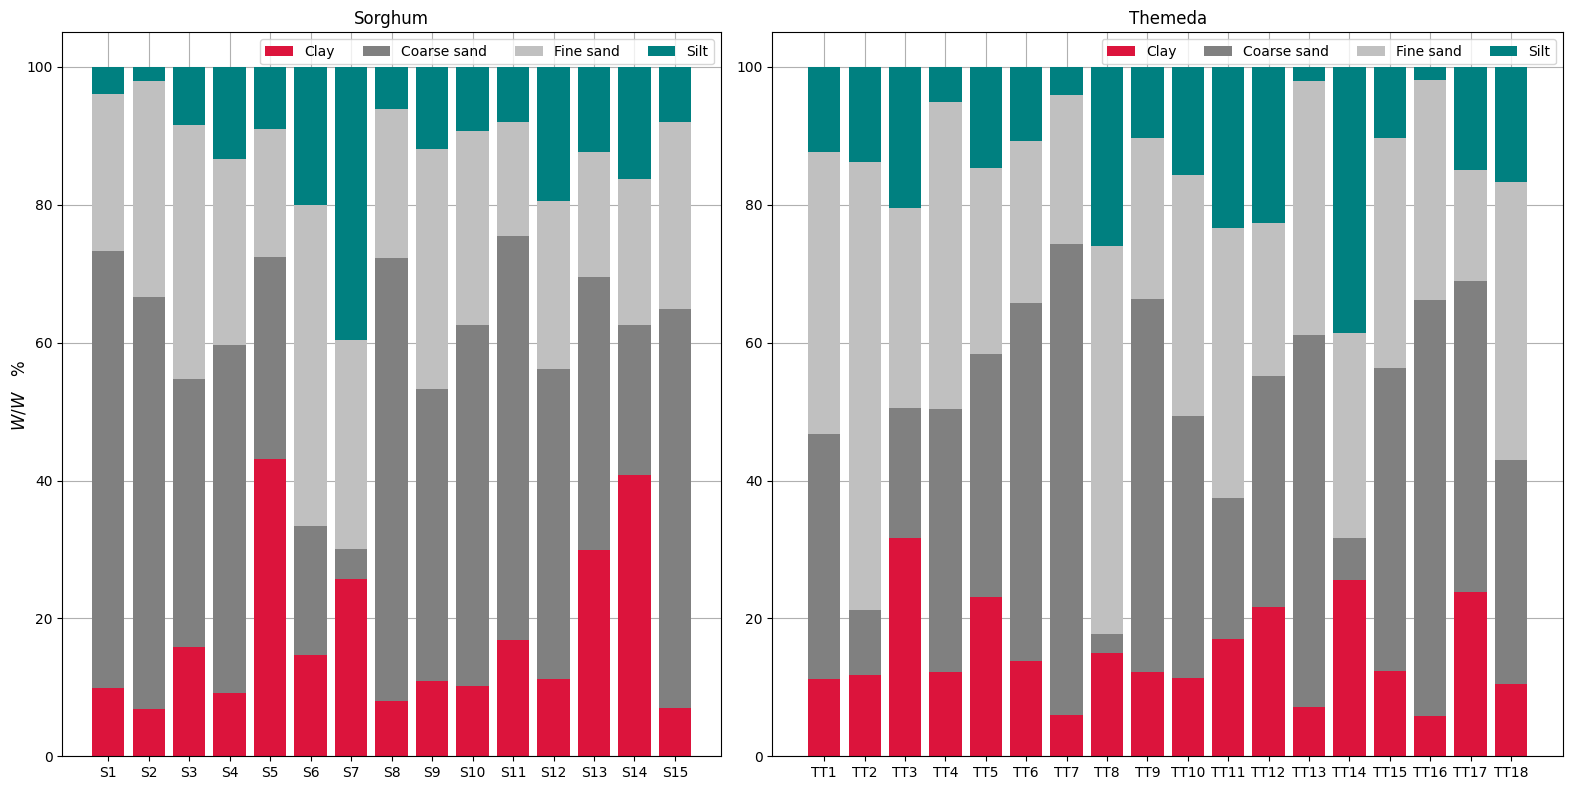

In [13]:
# Soil texture
fig, axes = plt.subplots(ncols=2, width_ratios=(15, 18))
fig.set_size_inches(16, 8)

for (axis, df, title) in zip(axes, (sorghum, themeda), ("Sorghum", "Themeda")):
    axis.bar(x=df.customer_sample_id, height=df.prcnt_clay, color="crimson", label="Clay")
    axis.bar(x=df.customer_sample_id, height=df.prcnt_course_sand, bottom=df.prcnt_clay, color="grey", label="Coarse sand")
    axis.bar(x=df.customer_sample_id, height=df.prcnt_fine_sand, bottom=df.prcnt_clay+df.prcnt_course_sand, color="silver", label="Fine sand")
    axis.bar(x=df.customer_sample_id, height=df.prcnt_silt, bottom=df.prcnt_clay+df.prcnt_sand, color="teal", label="Silt")
    axis.legend(loc="upper right")
    axis.set_axisbelow(True)
    axis.grid()
    axis.legend(loc="upper right", ncols=4)
    axis.set_title(title)
fig.supylabel(r"$W/W\hspace{1}\%$")    
plt.tight_layout()
plt.show()
# plt.savefig(fname=r"../plots/emma_soil_texture.jpeg", dpi=500)

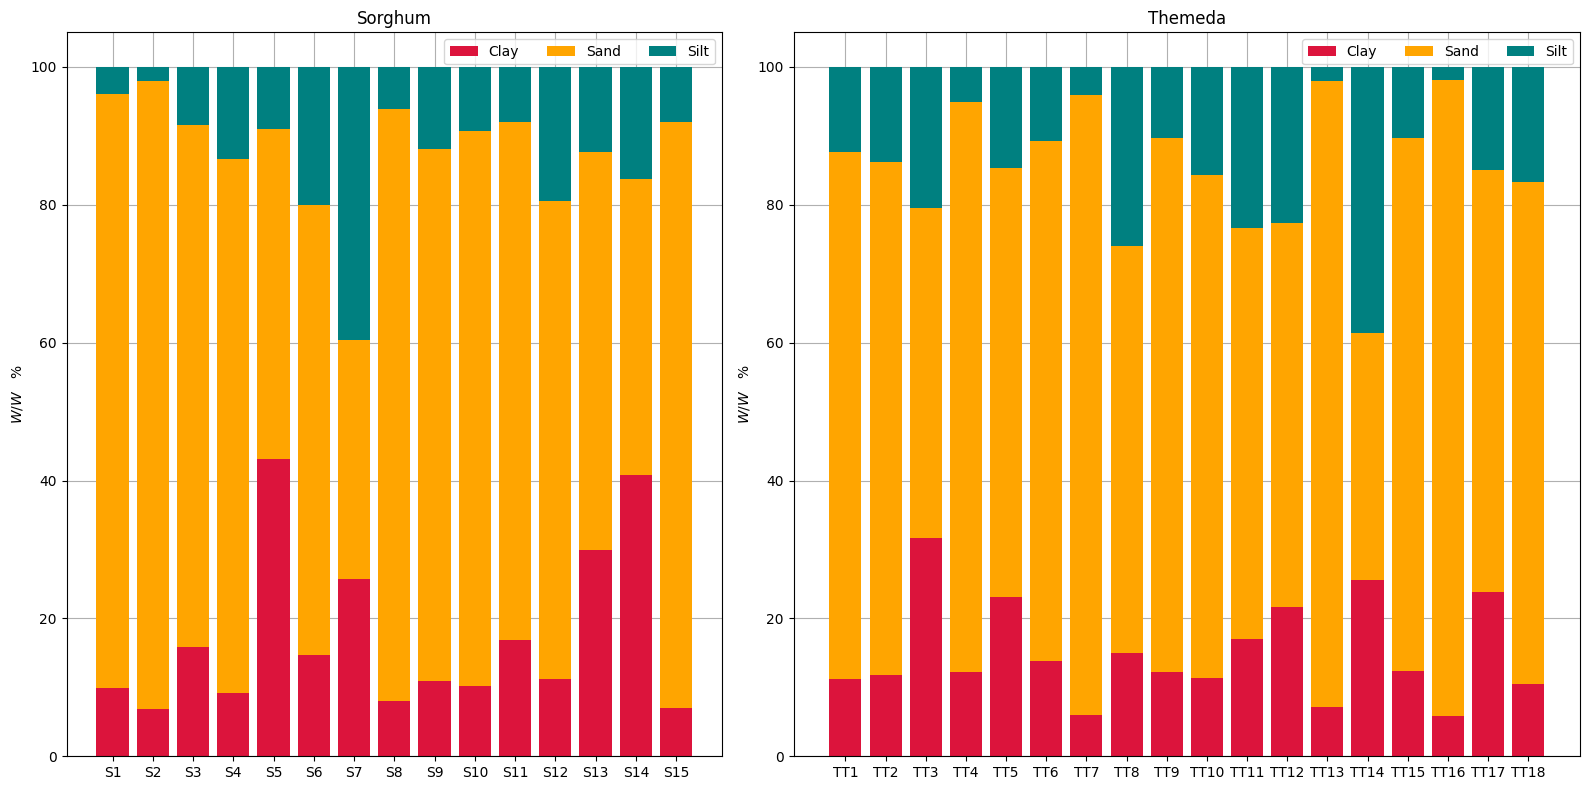

In [9]:
# without differentiating sand into coarse and fine sand

fig, axes = plt.subplots(ncols=2, width_ratios=(15, 18))
fig.set_size_inches(16, 8)

for (axis, df, title) in zip(axes, (sorghum, themeda), ("Sorghum", "Themeda")):
    axis.bar(x=df.customer_sample_id, height=df.prcnt_clay, color="crimson", label="Clay")
    axis.bar(x=df.customer_sample_id, height=df.prcnt_sand, bottom=df.prcnt_clay, color="orange", label="Sand")
    axis.bar(x=df.customer_sample_id, height=df.prcnt_silt, bottom=df.prcnt_clay+df.prcnt_sand, color="teal", label="Silt")
    axis.legend(loc="upper right", ncols=3)
    axis.set_axisbelow(True)
    axis.grid()
    axis.set_ylabel(r"$W/W\hspace{1}\%$")
    axis.set_title(title)

plt.tight_layout()
plt.show()

# ___Goegraphics___
-------------

In [9]:
sorghum;

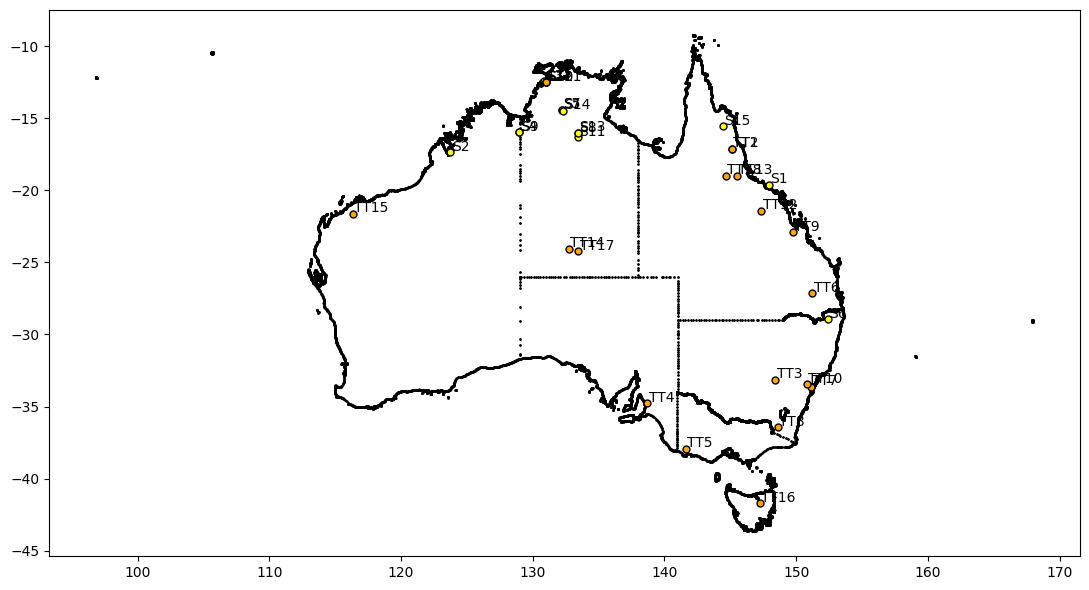

In [13]:
fig, axes = plt.subplots()
fig.set_size_inches(11, 6)
axes.scatter(border[:, 0], border[:, 1], color="black", s=0.5)
for (_, (sample, lat, long)) in sorghum.loc[:, ["customer_sample_id", "latitude", "longitude"]].iterrows():
    axes.plot(long, lat, label=sample, marker='o', markersize=5, markeredgecolor="black", markerfacecolor="yellow", linestyle="none")
    axes.text(x=long+.1, y=lat+.1, s=sample, color="black")
for (_, (sample, lat, long)) in themeda.loc[:, ["customer_sample_id", "latitude", "longitude"]].iterrows():
    axes.plot(long, lat, label=sample, marker='o', markersize=5, markeredgecolor="black", markerfacecolor="orange", linestyle="none")
    axes.text(x=long+.1, y=lat+.1, s=sample, color="black")    
# axes.legend()
plt.tight_layout()
plt.show()

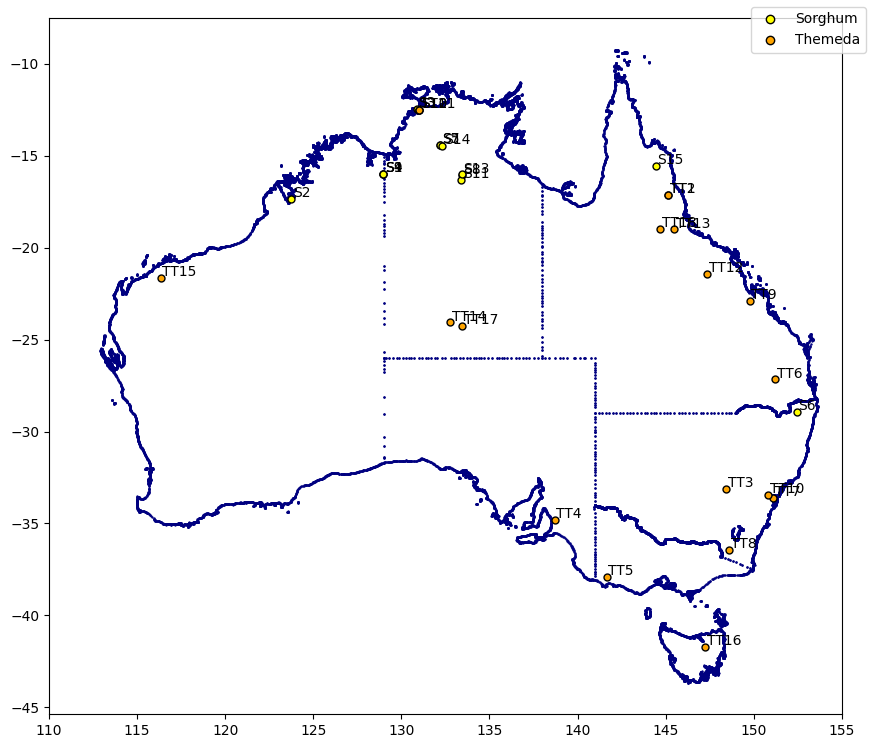

In [35]:
fig, axes = plt.subplots()
fig.set_size_inches(8.75, 7.5)
axes.scatter(border[:, 0], border[:, 1], color="navy", s=0.5)
for (_, (sample, lat, long)) in geo.loc[:, ["soil_sample_ID", "latitude", "longitude"]].iterrows():
    axes.plot(long, lat, label=sample, marker='o', markersize=5, markeredgecolor="black", markerfacecolor="yellow", linestyle="none")
    axes.text(x=long+.1, y=lat+.1, s=sample, color="black")
for (_, (sample, lat, long)) in themeda.loc[:, ["customer_sample_id", "latitude", "longitude"]].iterrows():
    axes.plot(long, lat, label=sample, marker='o', markersize=5, markeredgecolor="black", markerfacecolor="orange", linestyle="none")
    axes.text(x=long+.1, y=lat+.1, s=sample, color="black") 
fig.legend(handles=(Line2D(xdata=[0], ydata=[0], color="yellow", label="Sorghum", marker='o', markeredgecolor="black", linestyle="none"),
                    Line2D(xdata=[0], ydata=[0], color="orange", label="Themeda", marker='o', markeredgecolor="black", linestyle="none")),
           ncols=1)#, loc="upper right") 
axes.set_xlim(110, 155)
plt.tight_layout()
plt.show()
# plt.savefig(fname=r"../plots/emma_sample_locations.jpeg", format="jpeg", dpi=500)

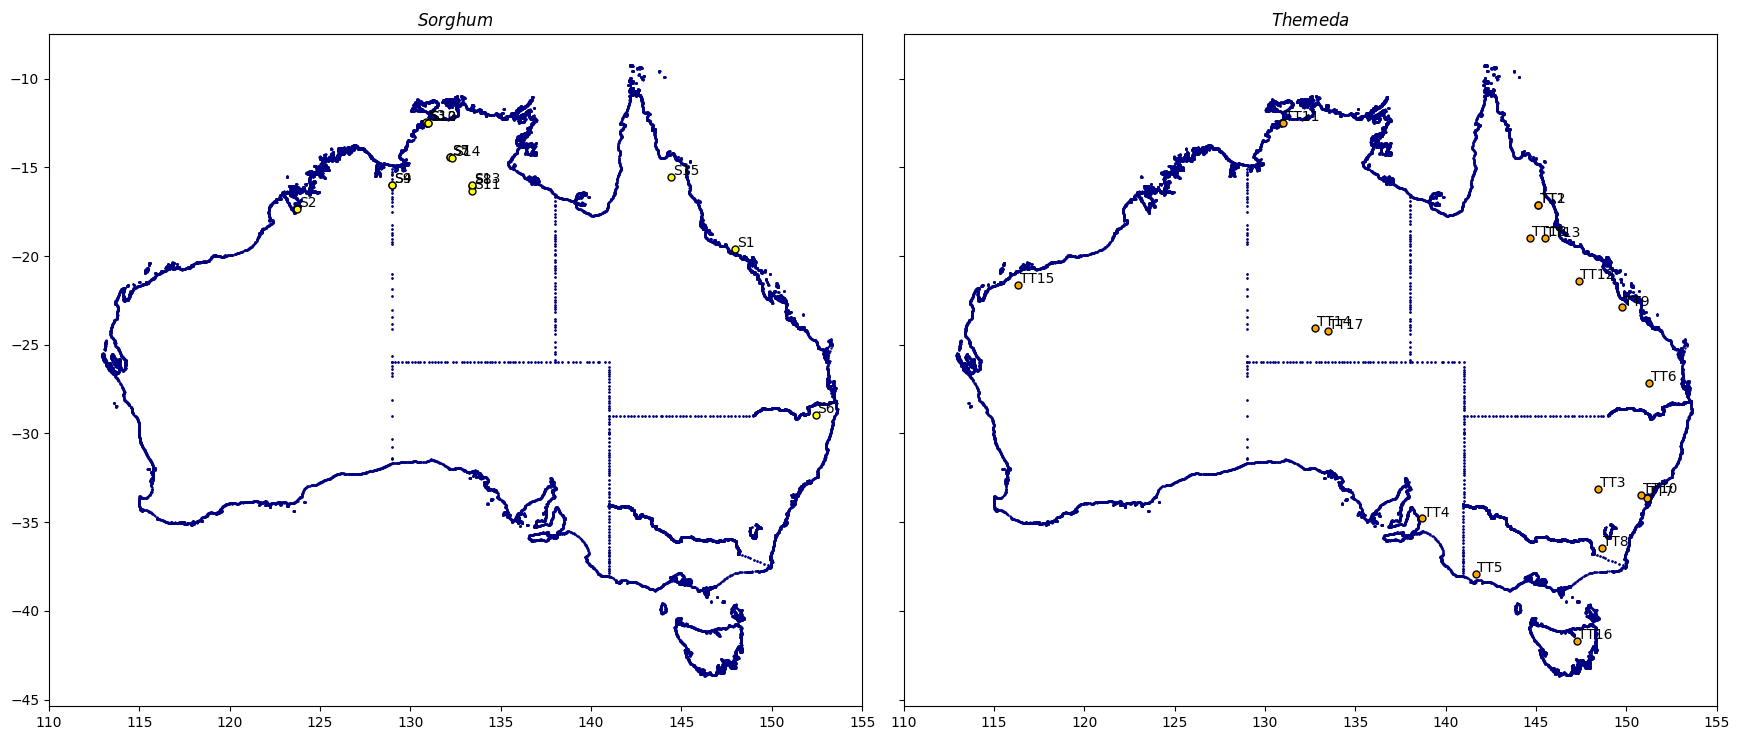

In [9]:
fig, (axes_s, axes_t) = plt.subplots(ncols=2, sharex=True, sharey=True)
fig.set_size_inches(8.75*2, 7.5)

axes_s.scatter(border[:, 0], border[:, 1], color="navy", s=0.5)
axes_t.scatter(border[:, 0], border[:, 1], color="navy", s=0.5)

for (_, (sample, lat, long)) in sorghum.loc[:, ["customer_sample_id", "latitude", "longitude"]].iterrows():
    axes_s.plot(long, lat, label=sample, marker='o', markersize=5, markeredgecolor="black", markerfacecolor="yellow", linestyle="none")
    axes_s.text(x=long+.1, y=lat+.1, s=sample, color="black")
axes_s.set_title(r"$Sorghum$")

for (_, (sample, lat, long)) in themeda.loc[:, ["customer_sample_id", "latitude", "longitude"]].iterrows():
    axes_t.plot(long, lat, label=sample, marker='o', markersize=5, markeredgecolor="black", markerfacecolor="orange", linestyle="none")
    axes_t.text(x=long+.1, y=lat+.1, s=sample, color="black") 
axes_t.set_title(r"$Themeda$")

# fig.legend(handles=(Line2D(xdata=[0], ydata=[0], color="yellow", label="Sorghum", marker='o', markeredgecolor="black", linestyle="none"),
#                    Line2D(xdata=[0], ydata=[0], color="orange", label="Themeda", marker='o', markeredgecolor="black", linestyle="none")),
#           ncols=1)#, loc="upper right")

axes_s.set_xlim(110, 155)
axes_t.set_xlim(110, 155)
plt.tight_layout()
plt.show()
# plt.savefig(fname=r"../plots/emma_sample_locations_separate.jpeg", format="jpeg", dpi=500)

## ___Themeda___
----------------

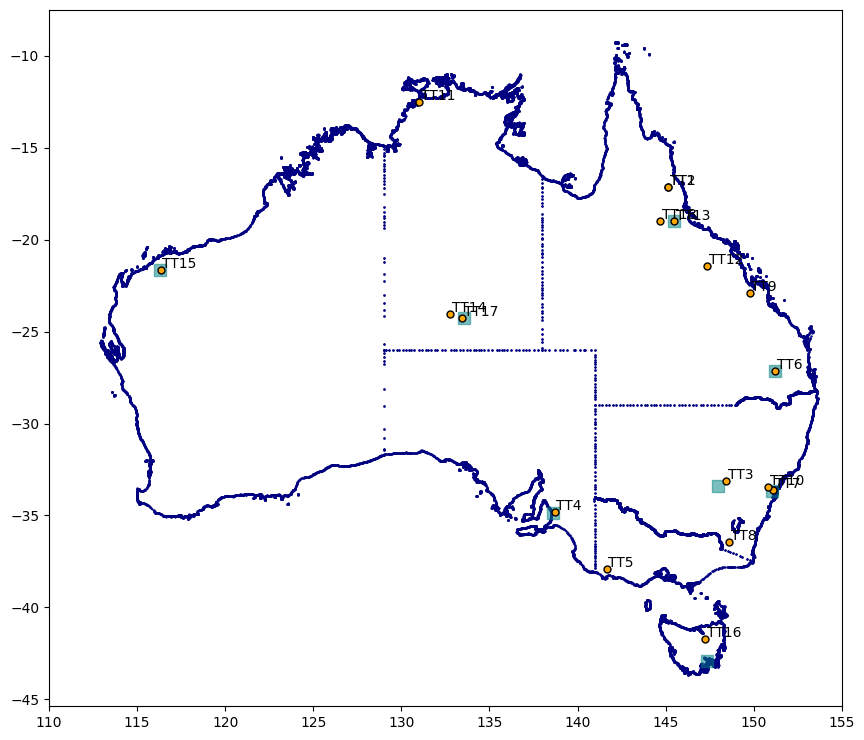

In [5]:
fig, axes = plt.subplots()
fig.set_size_inches(8.75, 7.5)
axes.scatter(border[:, 0], border[:, 1], color="navy", s=0.5)
for (_, (sample, lat, long)) in themeda.loc[:, ["customer_sample_id", "latitude", "longitude"]].iterrows():
    axes.plot(long, lat, label=sample, marker='o', markersize=5, markeredgecolor="black", markerfacecolor="orange", linestyle="none")
    axes.text(x=long+.1, y=lat+.1, s=sample, color="black")

axes.scatter(themeda_seeds.longitude, themeda_seeds.latitude, edgecolor="teal", facecolor="teal", s=70, marker='s', alpha=0.51)

axes.set_xlim(110, 155)
plt.tight_layout()
plt.show()
# plt.savefig(fname=r"../plots/emma_vin_themeda_locations.jpeg", format="jpeg", dpi=500)

In [32]:
CHOSEN_SITES = ("TT4", "TT6", "TT7", "TT13", "TT15", "TT17")
themeda_subset = themeda.query("customer_sample_id.isin(@CHOSEN_SITES)")

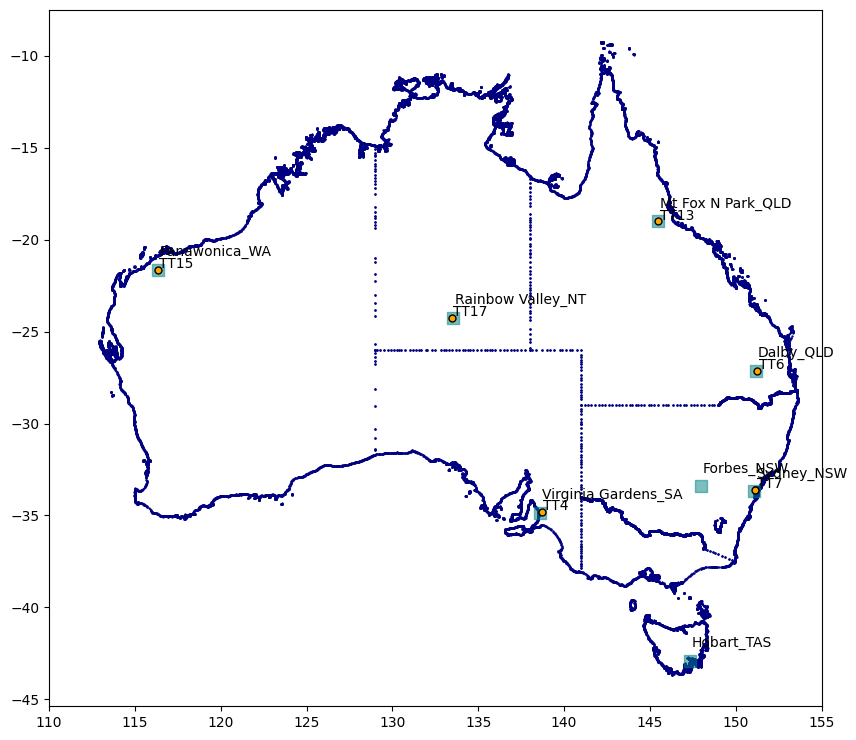

In [33]:
fig, axes = plt.subplots()
fig.set_size_inches(8.75, 7.5)
axes.scatter(border[:, 0], border[:, 1], color="navy", s=0.5)

for (_, (sample, lat, long)) in themeda_subset.loc[:, ["customer_sample_id", "latitude", "longitude"]].iterrows():
    axes.plot(long, lat, label=sample, marker='o', markersize=5, markeredgecolor="black", markerfacecolor="orange", linestyle="none")
    axes.text(x=long+.1, y=lat+.1, s=sample, color="black")

for (_, (site, lat, long)) in themeda_seeds.loc[:, ["Location", "latitude", "longitude"]].iterrows():
    axes.scatter(long, lat, edgecolor="teal", facecolor="teal", s=70, marker='s', alpha=0.51)
    axes.text(x=long+.1, y=lat+.75, s=site, color="black")

axes.set_xlim(110, 155)
plt.tight_layout()
plt.show()

In [34]:
themeda_subset

,lab_number,date_received,customer_sample_id,sample_name_1,sample_name_2,latitude,longitude,depth,colour,gravel_percent,...,ph_level_cacl2,ph_level_h2o,total_nitrogen,total_phosphorus,total_carbon,prcnt_clay,prcnt_course_sand,prcnt_fine_sand,prcnt_sand,prcnt_silt
4,2KGS24027,12/09/2024,TT4,CHS VIC,Condah Hotspur Rd Vic,-34.784167,138.696667,0-10,GRBR,5,...,5.1,6.1,0.11,91.0,1.56,12.22,38.15,44.51,82.66,5.11
6,2KGS24029,12/09/2024,TT6,HH NSW,Hornsby Heights NSW,-27.156601,151.235198,0-10,DKBR,5-Oct,...,4.9,5.9,0.18,229.2,4.04,13.88,51.89,23.51,75.40,10.72
7,2KGS24030,12/09/2024,TT7,JIN NSW,Jindabyne NSW,-33.629080,151.113020,0-10,YWGR,5,...,6.0,7.0,0.03,221.2,0.53,5.98,68.36,21.64,90.00,4.02
13,2KGS24037,12/09/2024,TT13,PV NT,Palm Valley NT,-19.001291,145.473311,0-10,BROR,0,...,6.4,7.9,0.05,160.1,0.68,7.10,53.97,36.89,90.86,2.04
15,2KGS24039,12/09/2024,TT15,POW TAS,Powranna TAS,-21.637977,116.334303,0-10,GRBR,5-Oct,...,4.8,5.3,0.15,156.5,2.65,12.40,43.88,33.34,77.22,10.38
17,2KGS24041,12/09/2024,TT17,TLJ QLD,The Lynd Junction QLD,-24.235000,133.459000,0-10,GRBR,35-40,...,5.5,6.5,0.09,224.8,1.89,23.85,45.11,16.11,61.22,14.94


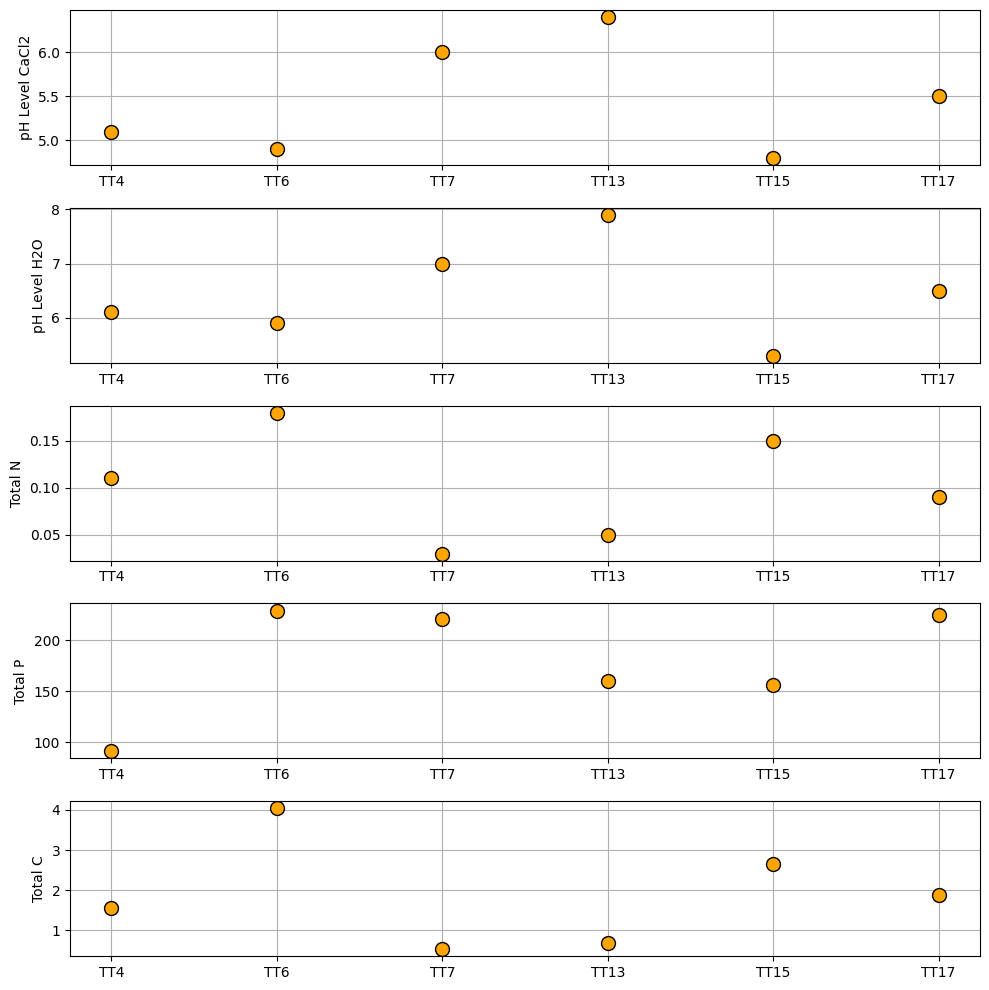

In [36]:
fig, axes = plt.subplots(nrows=5, sharex=False, sharey=False)
fig.set_size_inches(10, 10)

for (prop, name, axis) in zip(('ph_level_cacl2', 'ph_level_h2o', 'total_nitrogen', 'total_phosphorus', 'total_carbon'), ('pH Level CaCl2', 'pH Level H2O', 'Total N', 'Total P', 'Total C'), axes):
    axis.plot(themeda_subset.customer_sample_id, themeda_subset[prop], linestyle="none", marker='o', mec="black", mfc="orange", markersize=10)
    axis.grid()
    axis.set_ylabel(name)

plt.tight_layout()
plt.show()
# plt.savefig(fname=r"../plots/emma_themeda_chemical_props.jpeg", dpi=500)

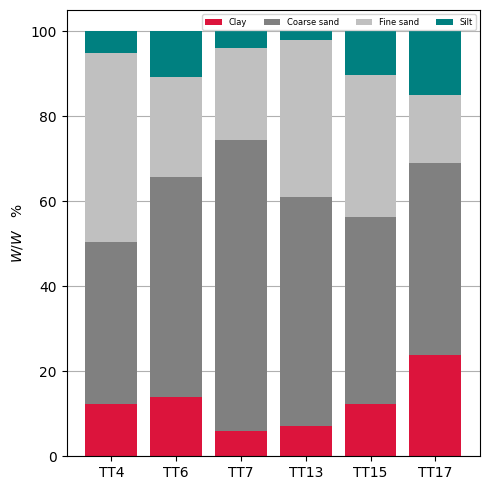

In [63]:
# Soil texture
fig, axes = plt.subplots()
fig.set_size_inches(5, 5)

axes.bar(x=themeda_subset.customer_sample_id, height=themeda_subset.prcnt_clay, color="crimson", label="Clay")
axes.bar(x=themeda_subset.customer_sample_id, height=themeda_subset.prcnt_course_sand, bottom=themeda_subset.prcnt_clay, color="grey", label="Coarse sand")
axes.bar(x=themeda_subset.customer_sample_id, height=themeda_subset.prcnt_fine_sand, bottom=themeda_subset.prcnt_clay+themeda_subset.prcnt_course_sand, color="silver", label="Fine sand")
axes.bar(x=themeda_subset.customer_sample_id, height=themeda_subset.prcnt_silt, bottom=themeda_subset.prcnt_clay+themeda_subset.prcnt_sand, color="teal", label="Silt")
axes.set_axisbelow(True)
axes.grid(axis='y')
axes.legend(loc="upper right", ncols=4, fontsize=6)
axes.set_ylabel(r"$W/W\hspace{1}\%$")    
plt.tight_layout()
plt.show()
# plt.savefig(fname=r"../plots/emma_themeda_subset_soil_texture.jpeg", dpi=500)

## ___Metereology___
----------------

In [22]:
man_temp = Image.open(r"../meanausan.png")
man_prcp = Image.open(r"../rnausan.png")

In [25]:
# cool
man_prcp.size, man_temp.size

((1099, 747), (1099, 747))

(875, 750)


ValueError: cannot reshape array of size 2625000 into shape (875,750,3)

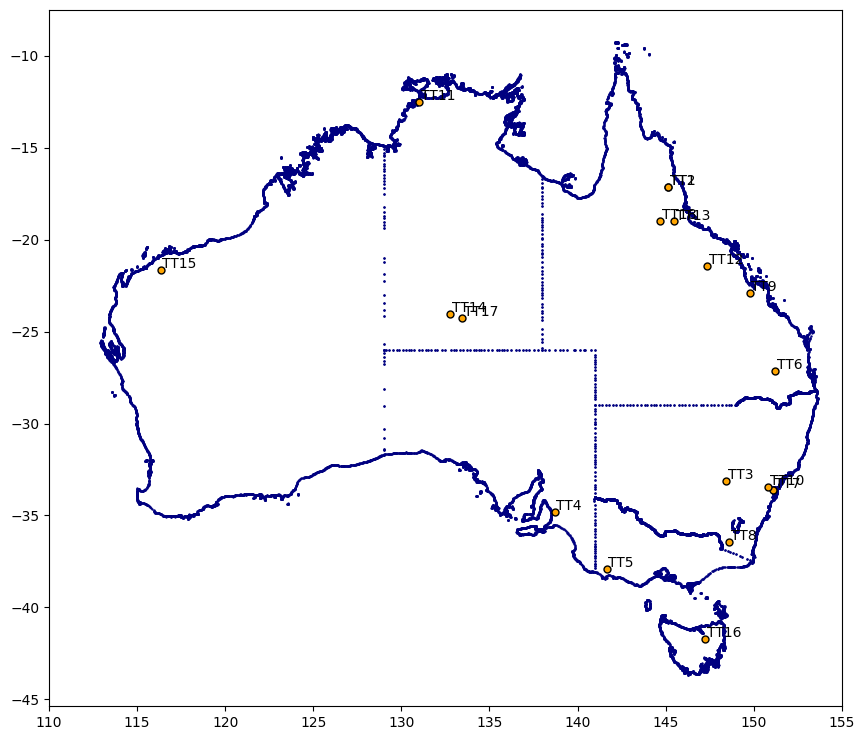

In [36]:
fig, axes = plt.subplots()
fig.set_size_inches(8.75, 7.5)
axes.scatter(border[:, 0], border[:, 1], color="navy", s=0.5)
for (_, (sample, lat, long)) in themeda.loc[:, ["customer_sample_id", "latitude", "longitude"]].iterrows():
    axes.plot(long, lat, label=sample, marker='o', markersize=5, markeredgecolor="black", markerfacecolor="orange", linestyle="none")
    axes.text(x=long+.1, y=lat+.1, s=sample, color="black") 
axes.set_xlim(110, 155)
plt.tight_layout()
# plt.show()
print(axes.figure.canvas.get_width_height())
map_aus = np.frombuffer(buffer=axes.figure.canvas.tostring_argb(), dtype=np.uint8).reshape(875, 750, 3)

In [37]:
875*750*3

1968750